# Stydy of investment trend

The Sparks funds, an asset management company wants to invest in different sectors of english speaking nation. They want to invest in the area where most of the market is invested in. This will be analyzed on three levels:
- Investment type analysis 
- Country analysis 
- Sector type analysis

In [1]:
#importing all the necesarry libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
#managing the view of output in jupyter notebook
%matplotlib inline
warnings.filterwarnings('ignore')#ignoring the display of warnings
pd.set_option('max_rows',None)

## Checkpoint 1: Data cleaning 1
1. Load the companies and rounds data (provided on the previous page) into two data frames and name them companies and rounds2 respectively.
2. Table 1.1: Fill out the spreadsheet which is attached in the download section. This holds true for all the tables.
 

### Importing the csv files 

- companies.csv containis the information of various companies and their details like website, category, Location, founding date. 
- rounds2.csv contains the information of different types and rounds of funding of various companies

The files are imported using the encoding ISO-8859-1

In [3]:
companies = pd.read_csv('companies.csv',encoding='ISO-8859-1')
rounds2 = pd.read_csv('rounds2.csv',encoding='ISO-8859-1')

In [4]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [5]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


### Cleaning of data
- Data is converted into same case for comparision to get the unique no of companies
- Data is corrected by using .encode() and .decode() to remove any non-ascii or gibberish text 

In [6]:
#Converting all text to uppercse for suitable comparision
rounds2.company_permalink=rounds2.company_permalink.str.upper()
companies.permalink=companies.permalink.str.upper()

In [7]:
#Renaming the permalinks by removing the non ascii characters 
rounds2['company_permalink'] = rounds2['company_permalink'].apply(lambda x: x.encode("ascii",errors='ignore').decode("ascii"))
companies['permalink'] = companies['permalink'].apply(lambda x: x.encode("ascii",errors='ignore').decode("ascii"))

###### Counting no of unique elements in both the files

In [8]:
print('No of unique values in companies dataframe is :',len(companies.permalink.unique()))
print('No of unique values in rounds2 dataframe is :',len(rounds2.company_permalink.unique()))

No of unique values in companies dataframe is : 66368
No of unique values in rounds2 dataframe is : 66368


In [9]:
k=np.sum(companies.permalink.unique()!=rounds2.company_permalink.unique())
if k!=0:answer='Y'
else : answer='N'
print('Are there any companies in the rounds2 file which are not present in companies? Answer yes or no:',answer)

Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: N


### Merging dataframe companies.csv and rounds2.csv as master_frame

In [10]:
master_frame=pd.merge(rounds2,companies,how='left',left_on='company_permalink',right_on='permalink')

In [11]:
print('No of observations present in master_frame after merging is:',master_frame.shape[0])

No of observations present in master_frame after merging is: 114949


In [12]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/ORGANIZATION/-QOUNTER,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/ORGANIZATION/0-6-COM,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [13]:
#Dropping coli=umns from master_frame which are duplicate or similar or not relevant for this analysis
master_frame.drop(['homepage_url','funding_round_permalink','permalink','state_code','region','city'],axis=1,inplace=True)

Removing the rows with status closed because we will not be investing in the closed companies. Assuming that Sparks Fund will only be investing in the companies which are not closed.

In [14]:
master_frame.status.value_counts()

operating    90153
acquired     11745
closed        8725
ipo           4326
Name: status, dtype: int64

In [15]:
#Removing the closed compaies
master_frame=master_frame[master_frame['status']!='closed']

In [16]:
master_frame.shape

(106224, 10)

In [17]:
master_frame.head()

,company_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,category_list,status,country_code,founded_at
0,/ORGANIZATION/-FAME,venture,B,05-01-2015,10000000.0,#fame,Media,operating,IND,NaN
1,/ORGANIZATION/-QOUNTER,venture,A,14-10-2014,NaN,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,04-09-2014
2,/ORGANIZATION/-QOUNTER,seed,NaN,01-03-2014,700000.0,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,04-09-2014
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,venture,B,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,operating,NaN,NaN
4,/ORGANIZATION/0-6-COM,venture,A,19-03-2008,2000000.0,0-6.com,Curated Web,operating,CHN,01-01-2007


## Checkpoint 2: Funding Type Analysis
Spark Funds wants to choose one of these four investment types for each potential investment they will make.Considering the constraints of Spark Funds, we have to decide one funding type which is most suitable for them.

1. Calculate the most representative value of the investment amount for each of the four funding types (venture, angel, seed, and private equity) and report the answers in Table 2.1
2. Based on the most representative investment amount calculated above, which investment type do you think is the most suitable for Spark Funds?

Considering that Spark Funds wants to invest between 5 to 15 million USD per investment round, which investment type is the most suitable for it? Identify the investment type and, for further analysis, filter the data so it only contains the chosen investment type. 

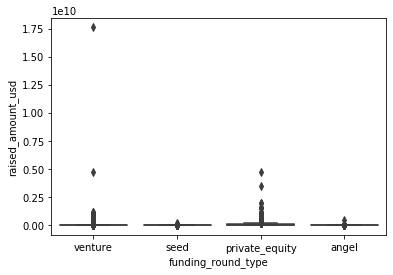

In [18]:
#Boxplot for different type of funding types
df=master_frame[master_frame['funding_round_type'].isin(['seed','angel','venture','private_equity'])]
sns.boxplot(data=df,x='funding_round_type',y='raised_amount_usd')

It can be observed clearly that there are many outliers in all the funding type. We cannot observe the box clearly that is why we will analyze the IQR  and mean using .describe() function to determine the represantative value for each funding type

In [19]:
#Analyzing the amount raised by different funsing types to get an idea of representative value
seed=master_frame[master_frame['funding_round_type']=='seed'].raised_amount_usd
angel=master_frame[master_frame['funding_round_type']=='angel'].raised_amount_usd
venture=master_frame[master_frame['funding_round_type']=='venture'].raised_amount_usd
private_equity=master_frame[master_frame['funding_round_type']=='private_equity'].raised_amount_usd
print('Seed:\n',seed.describe(),'\n\nAngel:\n',angel.describe(),'\n\nVenture:\n',venture.describe(),'\n\nPrivate:\n',private_equity.describe())

Seed:
 count    2.174900e+04
mean     7.385902e+05
std      2.280015e+06
min      0.000000e+00
25%      6.000000e+04
50%      3.000000e+05
75%      1.000000e+06
max      2.000000e+08
Name: raised_amount_usd, dtype: float64 

Angel:
 count    4.305000e+03
mean     9.799154e+05
std      7.824931e+06
min      0.000000e+00
25%      1.528420e+05
50%      4.000000e+05
75%      1.000000e+06
max      4.945120e+08
Name: raised_amount_usd, dtype: float64 

Venture:
 count    4.664100e+04
mean     1.189560e+07
std      8.935104e+07
min      0.000000e+00
25%      1.634000e+06
50%      5.000000e+06
75%      1.200000e+07
max      1.760000e+10
Name: raised_amount_usd, dtype: float64 

Private:
 count    1.806000e+03
mean     7.557581e+07
std      2.040155e+08
min      0.000000e+00
25%      5.270000e+06
50%      2.000000e+07
75%      7.594064e+07
max      4.745460e+09
Name: raised_amount_usd, dtype: float64


Here we can observe that due to presence of outliers the data is skewed and there is significant difference in the mean and median in all four categories. So, it will be more appropriate to select the **Median** as the representative value as it is not affected by outliers.

In [20]:
#Calculating representative values
print('Representative value for Seed funding in USD is:',seed.median())
print('Representative value for Angel investors in USD is:',angel.median())
print('Representative value for Venture capital in USD is:',venture.median())
print('Representative value for Private Equity in USD is:',private_equity.median())

Representative value for Seed funding in USD is: 300000.0
Representative value for Angel investors in USD is: 400000.0
Representative value for Venture capital in USD is: 5000000.0
Representative value for Private Equity in USD is: 20000000.0


In excel sheet it asks for the average value which is mean, so for mean value we have to remove the outliers which are more than Q3+1.5*IQR and we will get the average values as shown below

In [21]:
#Calculating the average values
seed=master_frame[(master_frame['funding_round_type']=='seed') & (master_frame['raised_amount_usd']<=2.4175*10**6)].raised_amount_usd
angel=master_frame[(master_frame['funding_round_type']=='angel')& (master_frame['raised_amount_usd']<=2.275*10**6) ].raised_amount_usd
venture=master_frame[(master_frame['funding_round_type']=='venture')& (master_frame['raised_amount_usd']<=27.6*10**6)].raised_amount_usd
private_equity=master_frame[(master_frame['funding_round_type']=='private_equity')& (master_frame['raised_amount_usd']<=180*10**6)].raised_amount_usd
print('Seed:\n',seed.describe(),'\n\nAngel:\n',angel.describe(),'\n\nVenture:\n',venture.describe(),'\n\nPrivate:\n',private_equity.describe())

Seed:
 count    2.049400e+04
mean     5.130125e+05
std      5.861762e+05
min      0.000000e+00
25%      5.000000e+04
50%      2.500000e+05
75%      8.000000e+05
max      2.414850e+06
Name: raised_amount_usd, dtype: float64 

Angel:
 count    4.018000e+03
mean     5.390560e+05
std      5.157599e+05
min      0.000000e+00
25%      1.500000e+05
50%      3.599990e+05
75%      8.000000e+05
max      2.265394e+06
Name: raised_amount_usd, dtype: float64 

Venture:
 count    4.257800e+04
mean     6.459085e+06
std      6.399135e+06
min      0.000000e+00
25%      1.500000e+06
50%      4.250000e+06
75%      1.000000e+07
max      2.760000e+07
Name: raised_amount_usd, dtype: float64 

Private:
 count    1.633000e+03
mean     3.535546e+07
std      4.105943e+07
min      0.000000e+00
25%      4.999999e+06
50%      1.552700e+07
75%      5.653235e+07
max      1.750000e+08
Name: raised_amount_usd, dtype: float64


In [22]:
print('Average value for Seed funding in USD is:',round(seed.mean(),0))
print('Average value for Angel investors in USD is:',round(angel.mean(),0))
print('Average value for Venture capital in USD is:',round(venture.mean(),0))
print('Average value for Private Equity in USD is:',round(private_equity.mean(),0))

Average value for Seed funding in USD is: 513012.0
Average value for Angel investors in USD is: 539056.0
Average value for Venture capital in USD is: 6459085.0
Average value for Private Equity in USD is: 35355463.0


Considering our investment range is 5 to 15 million USD and considering the IQR range and the represantative values of different funding types of market scenario it is better for Spark Funds to consider **Venture** type of investment

In [23]:
#Filtering the data frame only to venture type investment for further analysis 
master_frame=master_frame[master_frame['funding_round_type']=='venture']

## Checkpoint 3: Country analysis 
Spark Funds wants to invest in countries with the highest amount of funding for the chosen investment type. This is a part of its broader strategy to invest where most investments are occurring.

1. Spark Funds wants to see the top nine countries which have received the highest total funding (across ALL sectors for the chosen investment type)
2. For the chosen investment type, make a data frame named top9 with the top nine countries (based on the total investment amount each country has received)

In [24]:
#creating top9 dataframe having the highest total investment for venture investment type
top9=pd.DataFrame(master_frame.groupby('country_code').raised_amount_usd.sum().sort_values(ascending=False))
top9=top9.iloc[:9,:]

In [25]:
top9

,raised_amount_usd
country_code,
USA,3.999351e+11
CHN,3.910177e+10
GBR,1.824134e+10
IND,1.405060e+10
CAN,8.825487e+09
FRA,6.775044e+09
ISR,6.503021e+09
DEU,6.061141e+09
JPN,3.242032e+09


Among these countries top 3 english speaking nations are **USA(United States of America)**, **GBR(United Kingdom)**, **IND(India)** as CHN(China is not an English speaking nation.
Now we know the three most investment-friendly countries and the most suited funding type for Spark Funds. Now we willfocus on finding the best sectors in these countries.

In [26]:
#Filtering the main dataframe to only top three english speaking nation for sector analysis in these nations
master_frame = master_frame[master_frame['country_code'].isin(['USA','GBR','IND'])]

In [27]:
master_frame.shape

(38923, 10)

# Checkpoint 4: Sector Analysis 1

You discuss with the CEO and come up with the business rule that the first string before the vertical bar will be considered the primary sector. In the example above, ‘Application Platforms’ will be considered the primary sector.

1. Extract the primary sector of each category list from the category_list column
2. Use the mapping file 'mapping.csv' to map each primary sector to one of the eight main sectors (Note that ‘Others’ is also considered one of the main sectors)

In [28]:
master_frame.head()

,company_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,category_list,status,country_code,founded_at
0,/ORGANIZATION/-FAME,venture,B,05-01-2015,10000000.0,#fame,Media,operating,IND,NaN
1,/ORGANIZATION/-QOUNTER,venture,A,14-10-2014,NaN,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,04-09-2014
5,/ORGANIZATION/004-TECHNOLOGIES,venture,NaN,24-07-2014,NaN,004 Technologies,Software,operating,USA,01-01-2010
10,/ORGANIZATION/0XDATA,venture,B,09-11-2015,20000000.0,H2O.ai,Analytics,operating,USA,01-01-2011
11,/ORGANIZATION/0XDATA,venture,NaN,03-01-2013,1700000.0,H2O.ai,Analytics,operating,USA,01-01-2011


### Determining primary sector

In [29]:
#Dropping the null value as primary sector cannot be determined with null values
master_frame.dropna(subset=['category_list'],inplace=True)

In [30]:
master_frame['primary_sector']=master_frame.category_list.apply(lambda x:x.split('|')[0].title())#Adding the column primary_sector

In [31]:
master_frame.primary_sector.value_counts()

Biotechnology                            5671
Software                                 3230
Advertising                              1830
Enterprise Software                      1572
Health Care                              1511
Analytics                                1398
Clean Technology                         1259
Mobile                                   1195
E-Commerce                               1090
Hardware + Software                      1020
Curated Web                              1002
Health And Wellness                       916
Semiconductors                            688
Games                                     609
Finance                                   563
Manufacturing                             528
Cloud Computing                           506
Security                                  470
Web Hosting                               397
Apps                                      364
Education                                 335
Android                           

### Importing mapping.csv
mapping.csv has all the main sector in wide format pivot table

In [32]:
#Importing mapping.csv
mapping = pd.read_csv('mapping.csv')
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [33]:
mapping.dropna(subset=['category_list'],inplace=True)#Dropping null values in category list

In [34]:
mapping.category_list.value_counts()

Clean Energy                             1
Consumer Goods                           1
Meeting Software                         1
Peer-to-Peer                             1
Fi0nce                                   1
Eyewear                                  1
Water                                    1
Advice                                   1
Employer Benefits Programs               1
Parking                                  1
Bitcoin                                  1
Email                                    1
Interest Graph                           1
Jour0lism                                1
Language Learning                        1
Intelligent Systems                      1
Corporate Wellness                       1
Gift Exchange                            1
Automated Kiosk                          1
Energy Storage                           1
Delivery                                 1
Water Purification                       1
Market Research                          1
Q&A        

In [35]:
#Replacing 0 with na to correct the values with the exception of Enterprise 2.0
mapping['category_list']=mapping['category_list'].apply(lambda x:x.replace('0','na').replace('.na','.0').title())

It can be observed that the mapping data frame is in wide format. To map the primary sector with the main sector we have to convert it to long format using pd.melt()

In [36]:
mapping=pd.melt(mapping,id_vars='category_list',var_name='main_sector')
mapping=mapping[mapping['value']==1]

In [37]:
mapping.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 687 entries, 7 to 6158
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   category_list  687 non-null    object
 1   main_sector    687 non-null    object
 2   value          687 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 21.5+ KB


In [38]:
#mapping of primary_sector to main_sector by merging master_frame with mapping
master_frame=pd.merge(master_frame,mapping[['category_list','main_sector']],how='left',left_on='primary_sector',right_on='category_list')

In [39]:
master_frame.head()

,company_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,category_list_x,status,country_code,founded_at,primary_sector,category_list_y,main_sector
0,/ORGANIZATION/-FAME,venture,B,05-01-2015,10000000.0,#fame,Media,operating,IND,NaN,Media,Media,Entertainment
1,/ORGANIZATION/-QOUNTER,venture,A,14-10-2014,NaN,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,04-09-2014,Application Platforms,Application Platforms,"News, Search and Messaging"
2,/ORGANIZATION/004-TECHNOLOGIES,venture,NaN,24-07-2014,NaN,004 Technologies,Software,operating,USA,01-01-2010,Software,Software,Others
3,/ORGANIZATION/0XDATA,venture,B,09-11-2015,20000000.0,H2O.ai,Analytics,operating,USA,01-01-2011,Analytics,Analytics,"Social, Finance, Analytics, Advertising"
4,/ORGANIZATION/0XDATA,venture,NaN,03-01-2013,1700000.0,H2O.ai,Analytics,operating,USA,01-01-2011,Analytics,Analytics,"Social, Finance, Analytics, Advertising"


In [40]:
master_frame.rename(columns={'category_list_x':'category_list'},inplace=True) #renaming category_list_x to category_list
master_frame.drop(columns='category_list_y',inplace=True)#dropping category_list_y which is same as primary_sector

In [41]:
master_frame.head()

,company_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,category_list,status,country_code,founded_at,primary_sector,main_sector
0,/ORGANIZATION/-FAME,venture,B,05-01-2015,10000000.0,#fame,Media,operating,IND,NaN,Media,Entertainment
1,/ORGANIZATION/-QOUNTER,venture,A,14-10-2014,NaN,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,04-09-2014,Application Platforms,"News, Search and Messaging"
2,/ORGANIZATION/004-TECHNOLOGIES,venture,NaN,24-07-2014,NaN,004 Technologies,Software,operating,USA,01-01-2010,Software,Others
3,/ORGANIZATION/0XDATA,venture,B,09-11-2015,20000000.0,H2O.ai,Analytics,operating,USA,01-01-2011,Analytics,"Social, Finance, Analytics, Advertising"
4,/ORGANIZATION/0XDATA,venture,NaN,03-01-2013,1700000.0,H2O.ai,Analytics,operating,USA,01-01-2011,Analytics,"Social, Finance, Analytics, Advertising"


In [42]:
master_frame[master_frame.main_sector.isnull()==True] #checking for null values in main_sector

,company_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,category_list,status,country_code,founded_at,primary_sector,main_sector
7250,/ORGANIZATION/CLEAN-VEHICLE-SOLUTIONS,venture,NaN,26-02-2010,125000.0,Clean Vehicle Solutions,Natural Gas Uses|Service Providers|Services,operating,USA,NaN,Natural Gas Uses,NaN
10039,/ORGANIZATION/DOLORES-SPEECH-PRODUCTS,venture,NaN,07-04-2015,250000.0,Dolores Speech Products,Adaptive Equipment|Innovation Management|Speec...,operating,USA,NaN,Adaptive Equipment,NaN
12477,/ORGANIZATION/FIVE-BELOW,venture,NaN,14-10-2010,194000000.0,Five Below,Specialty Retail,ipo,USA,NaN,Specialty Retail,NaN
14785,/ORGANIZATION/HEALTHTELL,venture,A,13-06-2014,9486929.0,HealthTell,Biotechnology and Semiconductor|Diagnostics|He...,operating,USA,01-01-2010,Biotechnology And Semiconductor,NaN
17713,/ORGANIZATION/JUSTINMIND,venture,A,17-12-2007,862000.0,Justinmind,Rapidly Expanding|Software|Usability|User Expe...,operating,USA,01-01-2007,Rapidly Expanding,NaN
29820,/ORGANIZATION/SENSE-LABS-INC-,venture,NaN,29-12-2014,2499999.0,Sense,GreenTech|Hardware|Home Automation|Internet of...,operating,USA,01-01-2013,Greentech,NaN
35725,/ORGANIZATION/VELOCOMP,venture,NaN,09-09-2011,1420000.0,Velocomp,Adaptive Equipment|Sporting Goods,operating,USA,NaN,Adaptive Equipment,NaN


-The 7 null values of main_sector represent that corresponding primary_sector values were not present in mapping.csv.
-Moreover, all the raised amount value are out of our range of 5 to 15 million so they are anyway not relevant except one i.e; Biotechnology And Semiconductor. It is also present in mapping.csv but as two different rows which are Biotechnology , Semiconductor and both of them comes under the main_sector Cleantech / Semiconductors 
-So, here it is assumed that the main_sector for  Biotechnology And Semiconducto is **Cleantech / Semiconductors**

In [43]:
mapping[mapping['category_list'].isin(['Biotechnology','Semiconductors'])]

,category_list,main_sector,value
1439,Biotechnology,Cleantech / Semiconductors,1
1957,Semiconductors,Cleantech / Semiconductors,1


In [44]:
# Imputing the main sector for Biotechnology And Semiconductor
master_frame.at[14785,'main_sector']='Cleantech / Semiconductors'

In [45]:
master_frame[master_frame.main_sector.isnull()==True] #checking for null values in main_sector

,company_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,category_list,status,country_code,founded_at,primary_sector,main_sector
7250,/ORGANIZATION/CLEAN-VEHICLE-SOLUTIONS,venture,NaN,26-02-2010,125000.0,Clean Vehicle Solutions,Natural Gas Uses|Service Providers|Services,operating,USA,NaN,Natural Gas Uses,NaN
10039,/ORGANIZATION/DOLORES-SPEECH-PRODUCTS,venture,NaN,07-04-2015,250000.0,Dolores Speech Products,Adaptive Equipment|Innovation Management|Speec...,operating,USA,NaN,Adaptive Equipment,NaN
12477,/ORGANIZATION/FIVE-BELOW,venture,NaN,14-10-2010,194000000.0,Five Below,Specialty Retail,ipo,USA,NaN,Specialty Retail,NaN
17713,/ORGANIZATION/JUSTINMIND,venture,A,17-12-2007,862000.0,Justinmind,Rapidly Expanding|Software|Usability|User Expe...,operating,USA,01-01-2007,Rapidly Expanding,NaN
29820,/ORGANIZATION/SENSE-LABS-INC-,venture,NaN,29-12-2014,2499999.0,Sense,GreenTech|Hardware|Home Automation|Internet of...,operating,USA,01-01-2013,Greentech,NaN
35725,/ORGANIZATION/VELOCOMP,venture,NaN,09-09-2011,1420000.0,Velocomp,Adaptive Equipment|Sporting Goods,operating,USA,NaN,Adaptive Equipment,NaN


## Checkpoint 5: Sector Analysis 2

Now, the aim is to find out the most heavily invested main sectors in each of the three countries (for funding type Venture and investments range of 5-15 M USD).

1. Create three separate data frames D1, D2 and D3 for each of the three countries containing the observations of funding type Venture falling within the 5-15 million USD range. The three data frames should contain:

    - All the columns of the master_frame along with the primary sector and the main sector

    - The total number (or count) of investments for each main sector in a separate column

    - The total amount invested in each main sector in a separate column

Using the three data frames, you can calculate the total number and amount of investments in each main sector.

In [46]:
# Creating different dataframe for three countries
D1=master_frame[master_frame['country_code']=='USA']
D2=master_frame[master_frame['country_code']=='GBR']
D3=master_frame[master_frame['country_code']=='IND']

In [47]:
#Applying the amount limit for Sparks fund and adding the rows investment_count and investment_amount for D1,D2 and D3
D1=D1[(D1['raised_amount_usd']>=5000000) & (D1['raised_amount_usd']<=15000000)]
D1['investment_count']=D1.groupby('main_sector')['main_sector'].transform('count')
D1['investment_amount']=D1.groupby('main_sector')['raised_amount_usd'].transform('sum')
D2=D2[(D2['raised_amount_usd']>=5000000) & (D2['raised_amount_usd']<=15000000)]
D2['investment_count']=D2.groupby('main_sector')['main_sector'].transform('count')
D2['investment_amount']=D2.groupby('main_sector')['raised_amount_usd'].transform('sum')
D3=D3[(D3['raised_amount_usd']>=5000000) & (D3['raised_amount_usd']<=15000000)]
D3['investment_count']=D3.groupby('main_sector')['main_sector'].transform('count')
D3['investment_amount']=D3.groupby('main_sector')['raised_amount_usd'].transform('sum')

In the Dataframes D1, D2 and D3: 
- The column investment_count is the total number (or count) of investments for each main sector
- The column investment_amunt is the total amount invested in each main sector in a separate column

In [48]:
D1.head()

,company_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,category_list,status,country_code,founded_at,primary_sector,main_sector,investment_count,investment_amount
5,/ORGANIZATION/0XDATA,venture,A,19-07-2014,8900000.0,H2O.ai,Analytics,operating,USA,01-01-2011,Analytics,"Social, Finance, Analytics, Advertising",2590,2.283077e+10
6,/ORGANIZATION/1-MAINSTREAM,venture,NaN,17-03-2015,5000000.0,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,01-03-2012,Apps,"News, Search and Messaging",1465,1.298891e+10
20,/ORGANIZATION/128-TECHNOLOGY,venture,NaN,16-12-2014,11999347.0,128 Technology,Service Providers|Technology,operating,USA,07-07-2014,Service Providers,Others,2758,2.463670e+10
23,/ORGANIZATION/1366-TECHNOLOGIES,venture,C,15-10-2013,15000000.0,1366 Technologies,Manufacturing,operating,USA,01-01-2007,Manufacturing,Manufacturing,739,6.700079e+09
24,/ORGANIZATION/1366-TECHNOLOGIES,venture,C,09-04-2015,5000000.0,1366 Technologies,Manufacturing,operating,USA,01-01-2007,Manufacturing,Manufacturing,739,6.700079e+09


In [49]:
D2.head()

,company_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,category_list,status,country_code,founded_at,primary_sector,main_sector,investment_count,investment_amount
113,/ORGANIZATION/365SCORES,venture,B,29-09-2014,5500000.0,365Scores,Android|Apps|iPhone|Mobile|Sports,operating,GBR,01-01-2008,Android,"Social, Finance, Analytics, Advertising",128,1.054628e+09
240,/ORGANIZATION/7DIGITAL,venture,A,01-01-2008,8468328.0,7digital,Content Creators|Content Delivery|Licensing|Mu...,acquired,GBR,01-01-2004,Content Creators,Entertainment,53,4.635147e+08
241,/ORGANIZATION/7DIGITAL,venture,NaN,19-10-2012,10000000.0,7digital,Content Creators|Content Delivery|Licensing|Mu...,acquired,GBR,01-01-2004,Content Creators,Entertainment,53,4.635147e+08
263,/ORGANIZATION/90MIN,venture,NaN,06-10-2015,15000000.0,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,01-01-2011,Media,Entertainment,53,4.635147e+08
264,/ORGANIZATION/90MIN,venture,NaN,07-05-2013,5800000.0,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,01-01-2011,Media,Entertainment,53,4.635147e+08


In [50]:
D3.head()

,company_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,category_list,status,country_code,founded_at,primary_sector,main_sector,investment_count,investment_amount
0,/ORGANIZATION/-FAME,venture,B,05-01-2015,10000000.0,#fame,Media,operating,IND,NaN,Media,Entertainment,32,272080000.0
56,/ORGANIZATION/21DIAMONDS-INDIA,venture,C,15-11-2012,6369507.0,21Diamonds,E-Commerce,operating,IND,01-06-2012,E-Commerce,Others,103,940289507.0
283,/ORGANIZATION/A-LITTLE-WORLD,venture,B,09-09-2008,6410000.0,A LITTLE WORLD,Finance,operating,IND,02-03-2000,Finance,"Social, Finance, Analytics, Advertising",59,535549550.0
941,/ORGANIZATION/ADLABS-IMAGICA,venture,NaN,28-10-2014,8180000.0,Adlabs Imagica,Entertainment|Tourism,operating,IND,NaN,Entertainment,Entertainment,32,272080000.0
1268,/ORGANIZATION/AGILE,venture,A,01-05-2011,5740000.0,Agile,Finance|Finance Technology|FinTech|Insurance,operating,IND,NaN,Finance,"Social, Finance, Analytics, Advertising",59,535549550.0


### Solution for Table 5.1

In [51]:
print('Total number of Investments (count) : \n USA:{} \n GBR:{} \n IND:{}'.format(D1.shape[0],D2.shape[0],D3.shape[0]))

Total number of Investments (count) : 
 USA:11287 
 GBR:582 
 IND:315


In [52]:
print('Total amount invested in USD : \n USA:{} \n GBR:{} \n IND:{}'.format(D1.raised_amount_usd.sum(),D2.raised_amount_usd.sum(),D3.raised_amount_usd.sum()))

Total amount invested in USD : 
 USA:101010153708.0 
 GBR:5053293406.0 
 IND:2820673602.0


In [53]:
#Solution for point 3-8
a=D1.main_sector.value_counts().head(3)
b=D2.main_sector.value_counts().head(3)
c=D3.main_sector.value_counts().head(3)
print('Top three Sector name and no. of investment : \n USA:{} \n GBR:{} \n IND:{}'.format(a,b,c))

Top three Sector name and no. of investment : 
 USA:Others                                     2758
Social, Finance, Analytics, Advertising    2590
Cleantech / Semiconductors                 2193
Name: main_sector, dtype: int64 
 GBR:Others                                     140
Social, Finance, Analytics, Advertising    128
Cleantech / Semiconductors                 116
Name: main_sector, dtype: int64 
 IND:Others                                     103
Social, Finance, Analytics, Advertising     59
News, Search and Messaging                  49
Name: main_sector, dtype: int64


#### For the top sector count-wise (point 3), which company received the highest investment?

In [54]:
#Checking the company for the highest amount raised
D1[D1.main_sector=='Others'].sort_values('raised_amount_usd',ascending=False).head()

,company_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,category_list,status,country_code,founded_at,primary_sector,main_sector,investment_count,investment_amount
8976,/ORGANIZATION/CURIOUS-COM,venture,B,13-02-2014,15000000.0,Curious.com,EdTech|Education,operating,USA,01-01-2012,Edtech,Others,2758,2.463670e+10
27872,/ORGANIZATION/RECOMMIND,venture,C,17-09-2013,15000000.0,Recommind,Enterprise Software,operating,USA,01-01-2000,Enterprise Software,Others,2758,2.463670e+10
29379,/ORGANIZATION/SCHOOLOGY,venture,C,24-06-2014,15000000.0,Schoology,Education|Software|Systems,operating,USA,01-05-2009,Education,Others,2758,2.463670e+10
11026,/ORGANIZATION/ENDECA,venture,C,01-06-2004,15000000.0,Endeca,E-Commerce|Enterprises|Enterprise Software|Search,acquired,USA,NaN,E-Commerce,Others,2758,2.463670e+10
3463,/ORGANIZATION/AVAMAR-TECHNOLOGIES,venture,NaN,22-09-2004,15000000.0,Avamar Technologies,Software,acquired,USA,01-01-1999,Software,Others,2758,2.463670e+10


If we analyze the different companies and different funding_round_code many rows has the raised amount as 15million. So it is difficult to decide the top company. So, for a particalur company we will aggregrate all the fundings of a company and determine in which company the investment is maximum. Similar analysis will be performed for all the dataframe i.e; D1,D2 and D3 

In [55]:
D1[D1.main_sector=='Others'].groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head()

company_permalink
/ORGANIZATION/VIRTUSTREAM            64300000.0
/ORGANIZATION/CAPELLA                54968051.0
/ORGANIZATION/AIRTIGHT-NETWORKS      54201907.0
/ORGANIZATION/DECARTA                52100000.0
/ORGANIZATION/BLACK-DUCK-SOFTWARE    51000000.0
Name: raised_amount_usd, dtype: float64

As we can see that in the range of 5-15 million investment in different venture rounds for main_sector Others. **VIRTUSTREAM** is the company highest aggregate investment in USA.

In [56]:
D2[D2.main_sector=='Others'].groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head()

company_permalink
/ORGANIZATION/ELECTRIC-CLOUD             37000000.0
/ORGANIZATION/SENSAGE                    36250000.0
/ORGANIZATION/SILVERRAIL-TECHNOLOGIES    29000000.0
/ORGANIZATION/OPENCLOUD                  27972766.0
/ORGANIZATION/MYOPTIQUE-GROUP            27694613.0
Name: raised_amount_usd, dtype: float64

Similarly, we can see that in the range of 5-15 million investment in different venture rounds for main_sector Others. **ELECTRIC CLOUD** is the company highest aggregate investment in GRB. 

In [57]:
D3[D3.main_sector=='Others'].groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head()

company_permalink
/ORGANIZATION/FIRSTCRY-COM        39000000.0
/ORGANIZATION/MYNTRA              38000000.0
/ORGANIZATION/COMMONFLOOR         32900000.0
/ORGANIZATION/PEPPERFRY-COM       28000000.0
/ORGANIZATION/ITZCASH-CARD-LTD    25000000.0
Name: raised_amount_usd, dtype: float64

Similarly, we can see that in the range of 5-15 million investment in different venture rounds for main_sector Others. **FIRSTCRY.COM** is the company highest aggregate investment in IND.  

####  For the second-best sector count-wise (point 4), which company received the highest investment? 

In [58]:
D1[D1.main_sector=='Social, Finance, Analytics, Advertising'].groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head()

company_permalink
/ORGANIZATION/SHOTSPOTTER    67933006.0
/ORGANIZATION/DEMANDBASE     63000000.0
/ORGANIZATION/INTACCT        61800000.0
/ORGANIZATION/NETBASE        60600000.0
/ORGANIZATION/LOTAME         59700000.0
Name: raised_amount_usd, dtype: float64

In the range of 5-15 million investment in different venture rounds for main_sector Social, Finance, Analytics, Advertising. **SHOTSPOTTER** is the company highest aggregate investment in USA.

In [59]:
D2[D2.main_sector=='Social, Finance, Analytics, Advertising'].groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head()

company_permalink
/ORGANIZATION/CELLTICK-TECHNOLOGIES    37500000.0
/ORGANIZATION/MYTHINGS                 34000000.0
/ORGANIZATION/ZOPA                     32900000.0
/ORGANIZATION/IMAGINI                  28550000.0
/ORGANIZATION/MARKETINVOICE            25553007.0
Name: raised_amount_usd, dtype: float64

In the range of 5-15 million investment in different venture rounds for main_sector Social, Finance, Analytics, Advertising. **CELLTICK TECHNOLOGIES** is the company highest aggregate investment in GBR.

In [60]:
D3[D3.main_sector=='Social, Finance, Analytics, Advertising'].groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head()

company_permalink
/ORGANIZATION/MANTHAN-SYSTEMS               50700000.0
/ORGANIZATION/KOMLI-MEDIA                   28000000.0
/ORGANIZATION/SHOPCLUES-COM                 25000000.0
/ORGANIZATION/INTARVO                       21900000.0
/ORGANIZATION/GRAMEEN-FINANCIAL-SERVICES    21556050.0
Name: raised_amount_usd, dtype: float64

In the range of 5-15 million investment in different venture rounds for main_sector Social, Finance, Analytics, Advertising. **MANTHAN SYSTEMS** is the company highest aggregate investment in IND.

## Checkpoint 6 : Plots

As a final step, you have to present your findings to the CEO of Spark Funds. Specifically, she wants to see the following plots:

1. A plot showing the fraction of total investments (globally) in angel, venture, seed, and private equity, and the average amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.

2. A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.

3. A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). 

### Plot 1: 

In [65]:
#Creating Dataframe with funding type and total and average investment
plot1 = pd.DataFrame({'funding_round_type':['seed','angel','venture','private_equity'],
                      'avg_investment':[seed.mean(),angel.mean(),venture.mean(),private_equity.mean()],
                     'tot_amount':[seed.sum(),angel.sum(),venture.sum(),private_equity.sum()]})

In [66]:
plot1['fraction%']=round(plot1['tot_amount']/plot1['tot_amount'].sum()*100,0)#Adding column fraction

In [67]:
plot1

,funding_round_type,avg_investment,tot_amount,fraction%
0,seed,5.130125e+05,1.051368e+10,3.0
1,angel,5.390560e+05,2.165927e+09,1.0
2,venture,6.459085e+06,2.750149e+11,80.0
3,private_equity,3.535546e+07,5.773547e+10,17.0


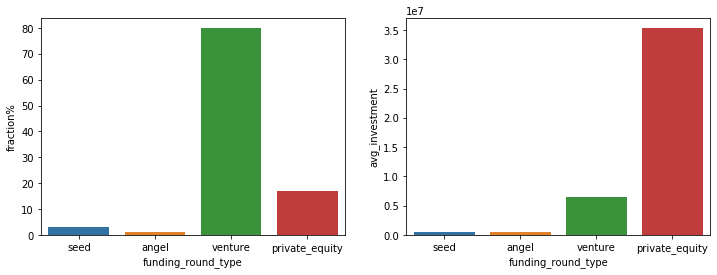

In [69]:
plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
sns.barplot(data=plot1,x='funding_round_type',y='fraction%')
plt.subplot(1,2,2)
sns.barplot(data=plot1,x='funding_round_type',y='avg_investment')
plt.show()

It can be cleary observed that the Venture is the most invested funding type and also the average value of venture fits the best in the limit of 5-10 million. 

### Plot 2:

In [70]:
top9.reset_index(inplace=True)

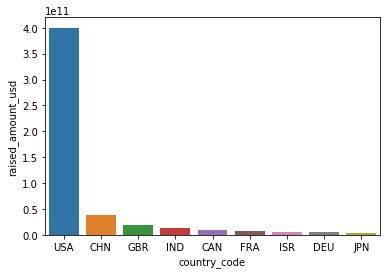

In [71]:
sns.barplot(x=top9.country_code,y=top9.raised_amount_usd)

We can obsereve that top 3 countries are USA, CHN and GBR but as CHN is not an english speaking nation. So, top 3 english speaking nation are USA, GBE and IND. 

### Plot 3:

Here 3 dataframe with attributes country, main_sector and count is created and then concatenated into single dataframe 

In [73]:
df1=D1[D1['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])]
df1=pd.DataFrame(df1.main_sector.value_counts())
df1['country']='USA'
df1.reset_index(inplace=True)

In [74]:
df2=D2[D2['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])]
df2=pd.DataFrame(df2.main_sector.value_counts())
df2['country']='GBR'
df2.reset_index(inplace=True)

In [75]:
df3=D3[D3['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','News, Search and Messaging'])]
df3=pd.DataFrame(df3.main_sector.value_counts())
df3['country']='IND'
df3.reset_index(inplace=True)

In [76]:
plot3=pd.concat([df1,df2,df3])
plot3.rename(columns={'index':'main_sector','main_sector':'count'},inplace=True)

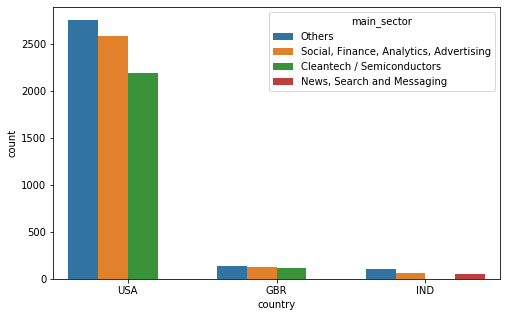

In [77]:
plt.figure(figsize=[8,5])
sns.barplot(data=plot3,x='country',y='count',hue='main_sector')

Above plot show the top 3 countries with their top3 sector and investment count for each sector.